In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer

 The data is downloaded from https://www.drivendata.org/competitions/66/flu-shot-learning/. 


In [2]:
# Loading and reading in the training set tables as dataframes. We have downloaded the data from 
# https://www.drivendata.org/competitions/66/flu-shot-learning/ in comma-seperated format. 
features_df = pd.read_csv('data/training_set_features.csv')

target_df = pd.read_csv('data/training_set_labels.csv')


In [3]:
# Display the first 5 rows of both dataframes
features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
#read the first 5 rows of the new dataframe 
target_df.head()


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [5]:
# retrieve the number of unique values and datatypes in each column

# initiate an empty dictionary
unique_dict = {}

# populate the dictionary with each column name as key and the number of unique values and datatype tied in as 
# as list of values using a 'for' loop
for x in features_df.columns:
    unique_dict[x] = [features_df[x].nunique(), str(features_df[x].dtype)]

unique_dict

{'respondent_id': [26707, 'int64'],
 'h1n1_concern': [4, 'float64'],
 'h1n1_knowledge': [3, 'float64'],
 'behavioral_antiviral_meds': [2, 'float64'],
 'behavioral_avoidance': [2, 'float64'],
 'behavioral_face_mask': [2, 'float64'],
 'behavioral_wash_hands': [2, 'float64'],
 'behavioral_large_gatherings': [2, 'float64'],
 'behavioral_outside_home': [2, 'float64'],
 'behavioral_touch_face': [2, 'float64'],
 'doctor_recc_h1n1': [2, 'float64'],
 'doctor_recc_seasonal': [2, 'float64'],
 'chronic_med_condition': [2, 'float64'],
 'child_under_6_months': [2, 'float64'],
 'health_worker': [2, 'float64'],
 'health_insurance': [2, 'float64'],
 'opinion_h1n1_vacc_effective': [5, 'float64'],
 'opinion_h1n1_risk': [5, 'float64'],
 'opinion_h1n1_sick_from_vacc': [5, 'float64'],
 'opinion_seas_vacc_effective': [5, 'float64'],
 'opinion_seas_risk': [5, 'float64'],
 'opinion_seas_sick_from_vacc': [5, 'float64'],
 'age_group': [5, 'object'],
 'education': [4, 'object'],
 'race': [4, 'object'],
 'sex': [2

In [6]:
# retrieve null value information from the dataframe

features_df.isnull().sum()


respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

The 'health_insurance', ''employment_industry' and 'employment_occupation' columns have large numbers of missing values.


In [7]:
features_df['employment_occupation'].isnull().sum() / len(features_df['employment_occupation'])


0.5043621522447298

A little more than 50% of the 'employment_occupation' column is missing


Taking a deeper look at the columns with 'object' datatype, we want to see what exactly is going on in there. An object datatype will usually signify a mixture of strings, or numbers as strings, etc.


In [8]:
# Instantiate an empty dictionary
object_dict = {}

# populate the dictionary with the column names of the columns with object datatype as keys and unique values as a 
# list of values

for x in unique_dict:
    if unique_dict[x][1] == 'object':
        object_dict[x] = list(features_df[x].unique())



In [9]:
object_dict

{'age_group': ['55 - 64 Years',
  '35 - 44 Years',
  '18 - 34 Years',
  '65+ Years',
  '45 - 54 Years'],
 'education': ['< 12 Years',
  '12 Years',
  'College Graduate',
  'Some College',
  nan],
 'race': ['White', 'Black', 'Other or Multiple', 'Hispanic'],
 'sex': ['Female', 'Male'],
 'income_poverty': ['Below Poverty',
  '<= $75,000, Above Poverty',
  '> $75,000',
  nan],
 'marital_status': ['Not Married', 'Married', nan],
 'rent_or_own': ['Own', 'Rent', nan],
 'employment_status': ['Not in Labor Force', 'Employed', 'Unemployed', nan],
 'hhs_geo_region': ['oxchjgsf',
  'bhuqouqj',
  'qufhixun',
  'lrircsnp',
  'atmpeygn',
  'lzgpxyit',
  'fpwskwrf',
  'mlyzmhmf',
  'dqpwygqj',
  'kbazzjca'],
 'census_msa': ['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
 'employment_industry': [nan,
  'pxcmvdjn',
  'rucpziij',
  'wxleyezf',
  'saaquncn',
  'xicduogh',
  'ldnlellj',
  'wlfvacwt',
  'nduyfdeo',
  'fcxhlnwr',
  'vjjrobsf',
  'arjwrbjb',
  'atmlpfrs',
  'msuufmds',
  'xqi

In [10]:
# me being curious about reltionship between employment status and h1n1 vax acceptance
# EMM = df.loc[(df['employment_status'] != "Not in Labor Force") | (df['employment_status'] != "nan")

# EMM['h1n1_vaccine'].value_counts(normalize=True) 

# df['h1n1_vaccine'].value_counts(normalize=True)



## Dealing with missing values

We have already identified three columns with large number of missing values:'employment_occupation', 'employment_industry' and 'health_insurance'. For the first model, we will not include the information in these
columns. Based off of the performance of the model, we an considering including the columns in further iterations of our models.

In [11]:
first_df = features_df.copy(deep=True)

In [12]:
first_df = first_df.fillna(first_df.mode().iloc[0])

In [13]:
first_df.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

There you go! Filled up and ready to be modelled. We can now go ahead in creating the dependent and independent
variables, X and y respectively.

## Combining the labels dataframe and the features dataframe into a single dataframe

In [57]:
df = pd.merge(target_df,first_df,on='respondent_id')

In [83]:
df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,fcxhlnwr,xtkaffoo
1,1,0,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,fcxhlnwr,xtkaffoo
4,4,0,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [84]:
# X1 = df.drop(columns=['h1n1_vaccine','seasonal_vaccine','respondent_id'])

In [85]:
# y1 = df['seasonal_vaccine']

## First Simple Model

For the first two models, a Dummy Classifier model with a 'most frequent' strategy and a Logistic regression model, we 
are using the numeric columns only. 

In [91]:
fsm_df = df.select_dtypes(exclude='object')

In [96]:
fsm_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0
1,1,0,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,4.0,0.0,0.0
2,2,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,2.0,2.0,0.0
3,3,0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,4.0,1.0,0.0,0.0
4,4,0,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,4.0,1.0,0.0


In [97]:
X1 = fsm_df.drop(columns=['respondent_id','h1n1_vaccine'])

X.shape

(26707, 18)

In [98]:
y1 = fsm_df['seasonal_vaccine']
y1.shape

(26707,)

## Create train-test split

In [99]:
# splitting the dependent and dependent variables into teaining and test sets using a test size of 30% and 
# random state of 42 for reproducability

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [100]:
print(f"X_train shape: {X_train.shape} \ny_train shape:{y_train.shape}")

X_train shape: (18694, 18) 
y_train shape:(18694,)


## Dealing with the categorical data

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [41]:
# List of categories to be OneHotEncoded
cat_enc_list =['race', 'sex','marital_status', 'rent_or_own', 'employment_status','hhs_geo_region', 'census_msa'] 

In [42]:
# List of categories to be OrdinalEncoded
ord_enc_list = ['age_group','education','income_poverty','employment_status']

In [43]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [44]:
oe = OrdinalEncoder()

In [45]:
ohe_train_array = ohe.fit_transform(X_train[['Primary Property Type - Self Selected']])


KeyError: "None of [Index(['Primary Property Type - Self Selected'], dtype='object')] are in the [columns]"

In [46]:
ohe.fit(X_train[cat_enc_list])

KeyError: "None of [Index(['race', 'sex', 'marital_status', 'rent_or_own', 'employment_status',\n       'hhs_geo_region', 'census_msa'],\n      dtype='object')] are in the [columns]"

In [ ]:
X_train_ohe = ohe.transform(X_train[cat_enc_list])

X_train_ohe

In [ ]:
X_test_ohe = ohe.transform(X_test[cat_enc_list])

X_test_ohe.shape

In [ ]:
oe = OrdinalEncoder()



## Run initial Dummy Classifier model

In [101]:
# Import the Dummy Classifier module from sklearn
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score

In [102]:
# Initializing the dummy classifier
dummy_clf = DummyClassifier(strategy='most_frequent')

In [103]:
# fit the instance to the training data
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [104]:
# run the model on the training set

y_pred = dummy_clf.predict(X_train)



In [105]:
# Return the mean accuracy on the training data. This should serve as the baseline accuracy going forward
dummy_clf.score(X_train, y_train)


0.5311864769444742

In [106]:
cv_results = cross_val_score(dummy_clf, X_train, y_train, cv=5)
cv_results

array([0.53115806, 0.53115806, 0.53115806, 0.53115806, 0.53130016])

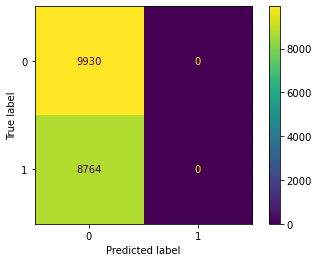

In [107]:
plot_confusion_matrix(dummy_clf,X_train,y_train)

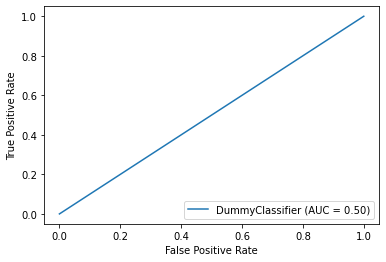

In [108]:
plot_roc_curve(dummy_clf, X_train, y_train);

## Logistic regression Model

In [109]:
# Initialize model 

first_logreg = LogisticRegression(random_state=1,penalty='none')

In [110]:
first_logreg.fit(X_train, y_train)

LogisticRegression(penalty='none', random_state=1)

In [111]:
first_logreg.predict(X_test)

array([0, 1, 0, ..., 0, 0, 1])

### Evaluating First Logistic Model

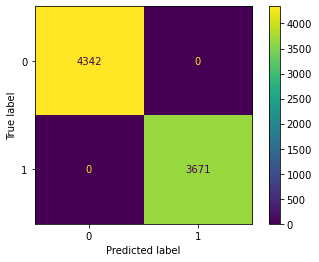

In [112]:
plot_confusion_matrix(first_logreg,X_test,y_test);